In [1]:
import perfmodel
import os.path
from os import path
import json
import glob
import numpy as np
import pandas as pd
from jsonpath_ng import jsonpath, parse
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline
#global defaults of graphics size
plt.rcParams["figure.figsize"] = [50, 50]

#Define run_id
run_id = "2020-10-23-15-59-41"
#point to test result folder containing runs
location = perfmodel.RunResultLocation("../testresults/azure.1-auto-standalone")

runDefinition = perfmodel.RunDefinition(location)
runDefinition.process_run_samples()
run = runDefinition.find_run(run_id)
meta = run.run_meta
df_latencies = pd.DataFrame(data={'run1': run.export_latency_node_distinct_latencies()})
df_ping = pd.DataFrame(run.export_ping_series(perfmodel.c_ping_all_metrics))


## Single Run Analytics

CONFIDENTIAL | NOT FOR DISTRIBUTION | DATA NOT VALIDATED

Cloudprovider: {{meta.cloud_provider}}

Infrastructure: {{meta.infrastructure}}

Run name: {{meta.run_name}}

Run Id: {{meta.run_id}}

Started: {{str(meta.ts_run_start)}}

Ended: {{str(meta.ts_run_end)}}

Duration: {{str(meta.run_duration_sec())}}


# Latency
## Basic stats

In [2]:
run1_series = df_latencies['run1']
run1_series.describe()

count    400000.000000
mean        194.916558
std         291.202484
min         130.000000
25%         163.000000
50%         169.000000
75%         177.000000
max       19032.000000
Name: run1, dtype: float64

## Quantiles

In [3]:
q1 = run1_series.quantile(q=[0.05,0.1,0.25,0.5,0.75,0.9,0.99,0.995,0.999,0.9999,0.99999])
q1

0.05000      153.00000
0.10000      157.00000
0.25000      163.00000
0.50000      169.00000
0.75000      177.00000
0.90000      191.00000
0.99000      554.00000
0.99500     1387.00500
0.99900     4700.00300
0.99990    10996.00040
0.99999    15040.00999
Name: run1, dtype: float64

## Scatter Plot

<AxesSubplot:>

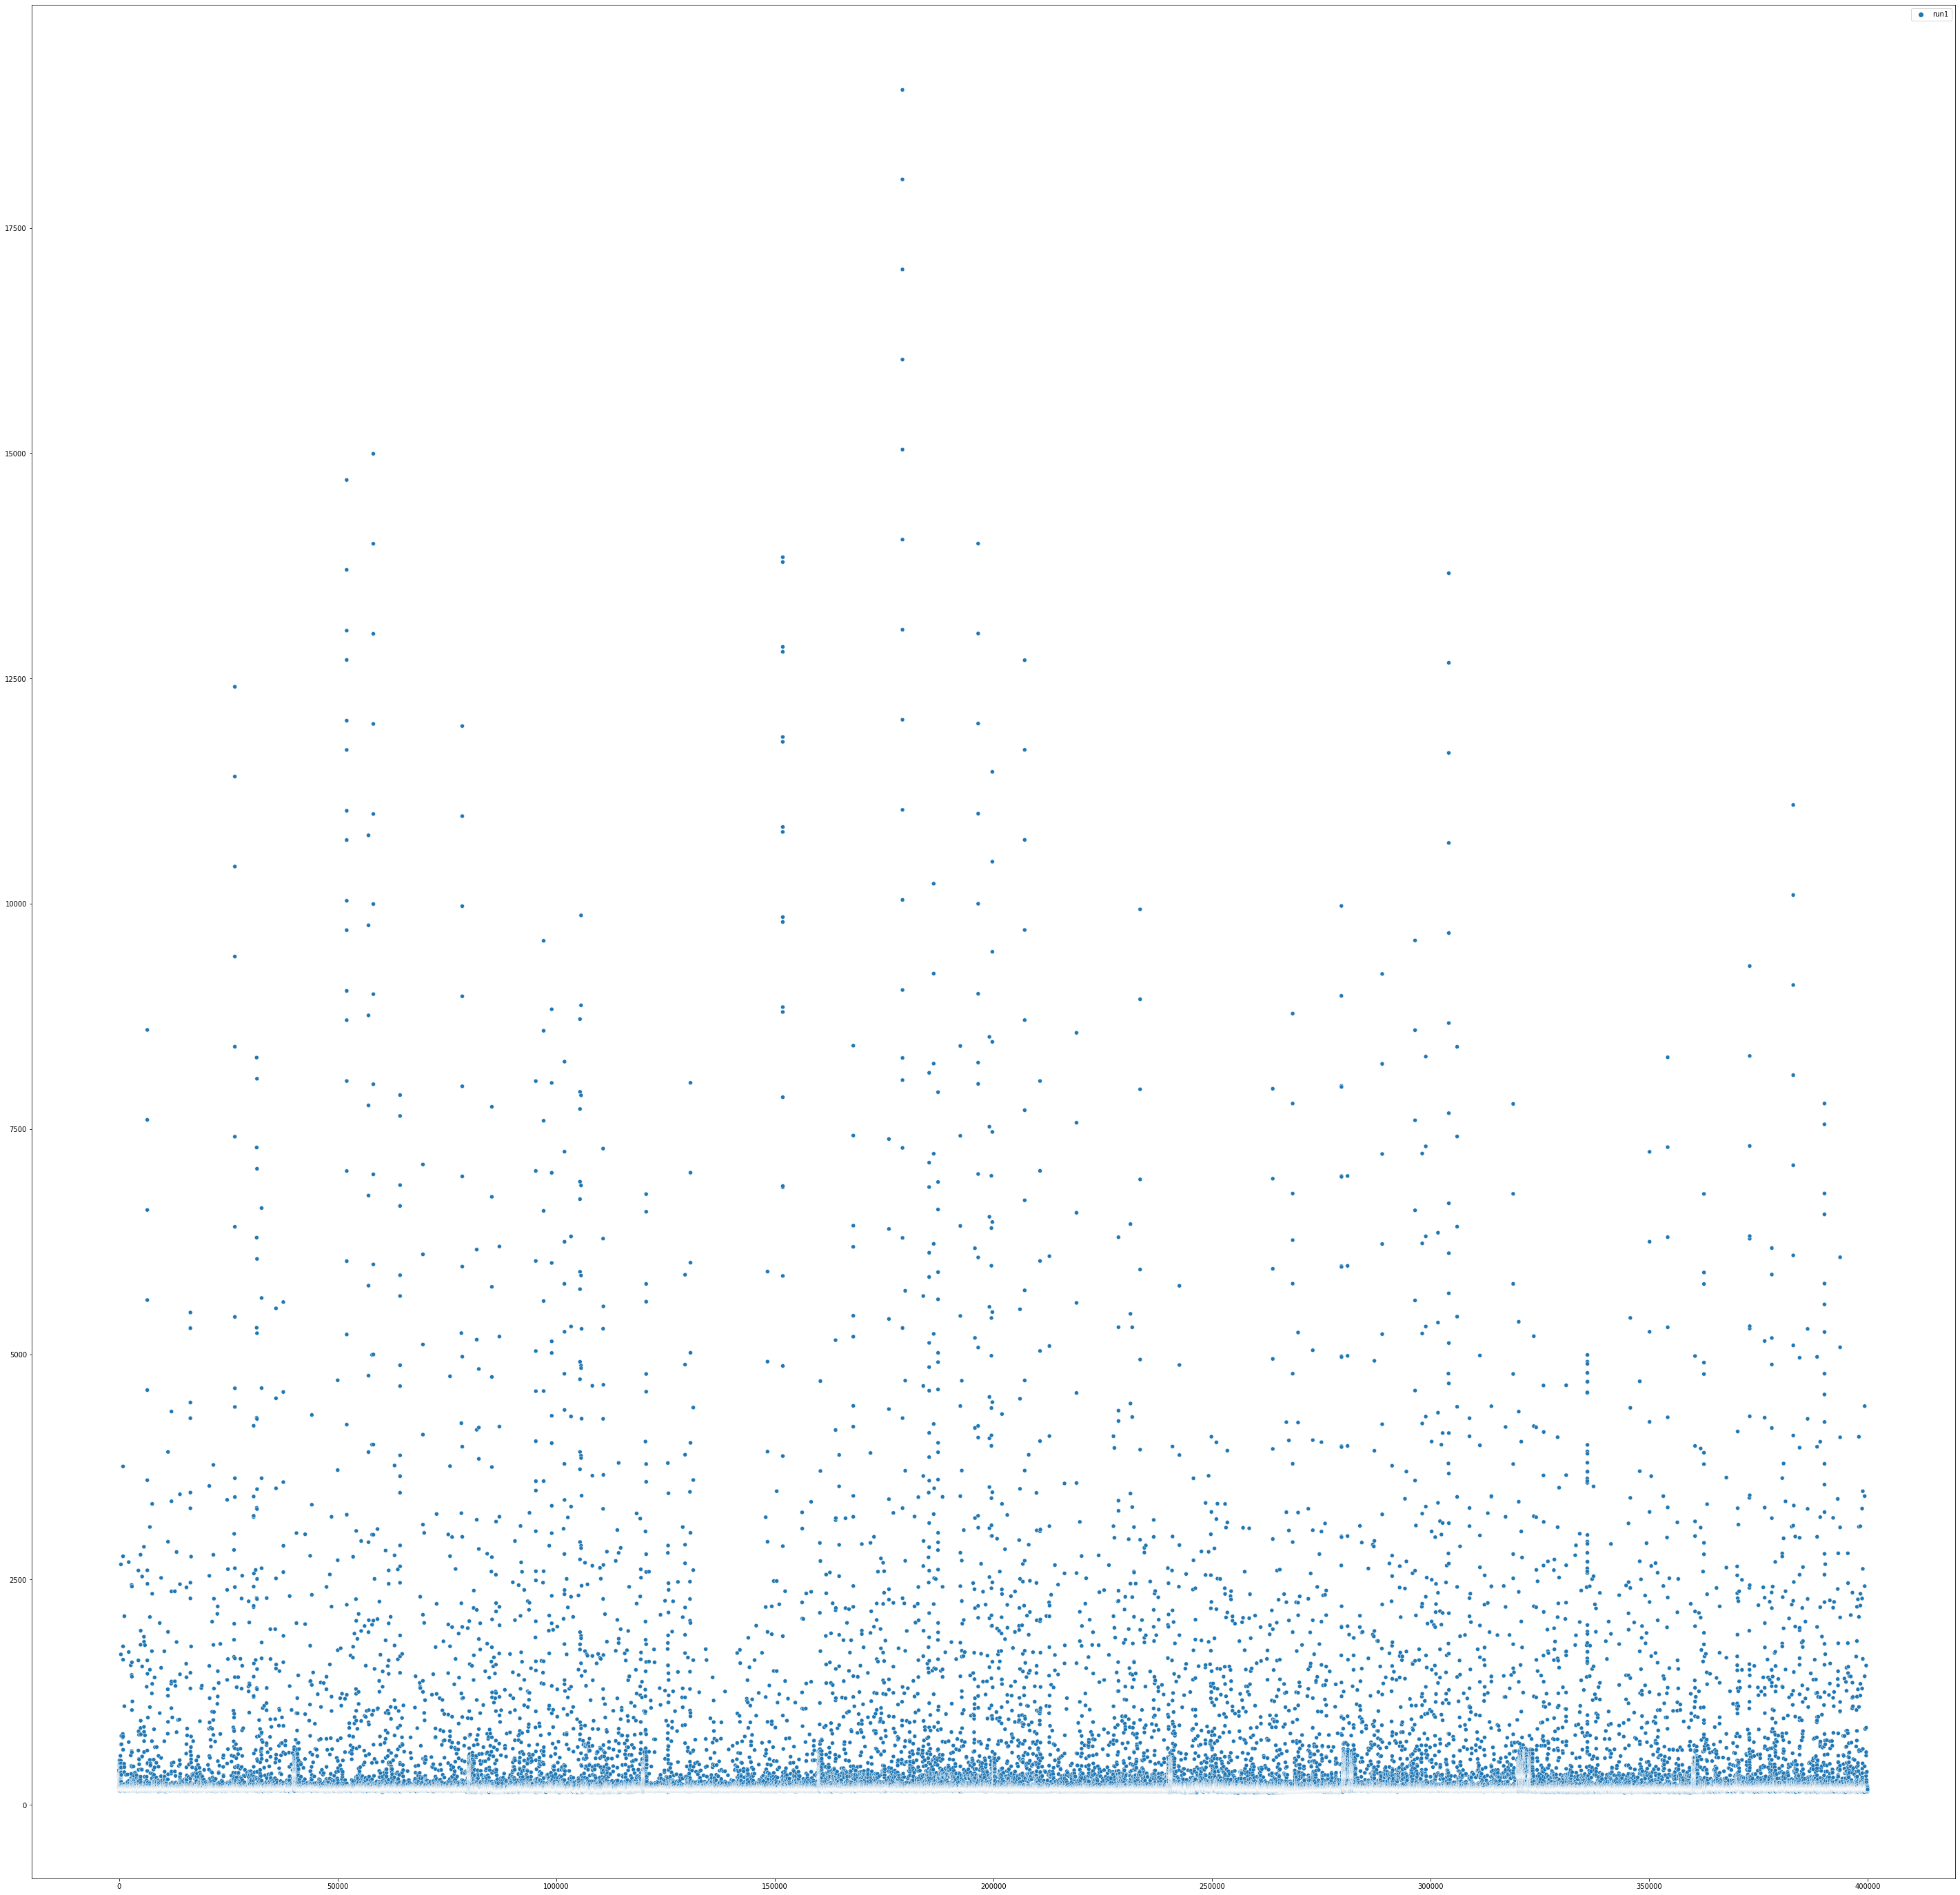

In [4]:
sns.scatterplot(data=df_latencies)

# Ping

<AxesSubplot:xlabel='metric', ylabel='value'>

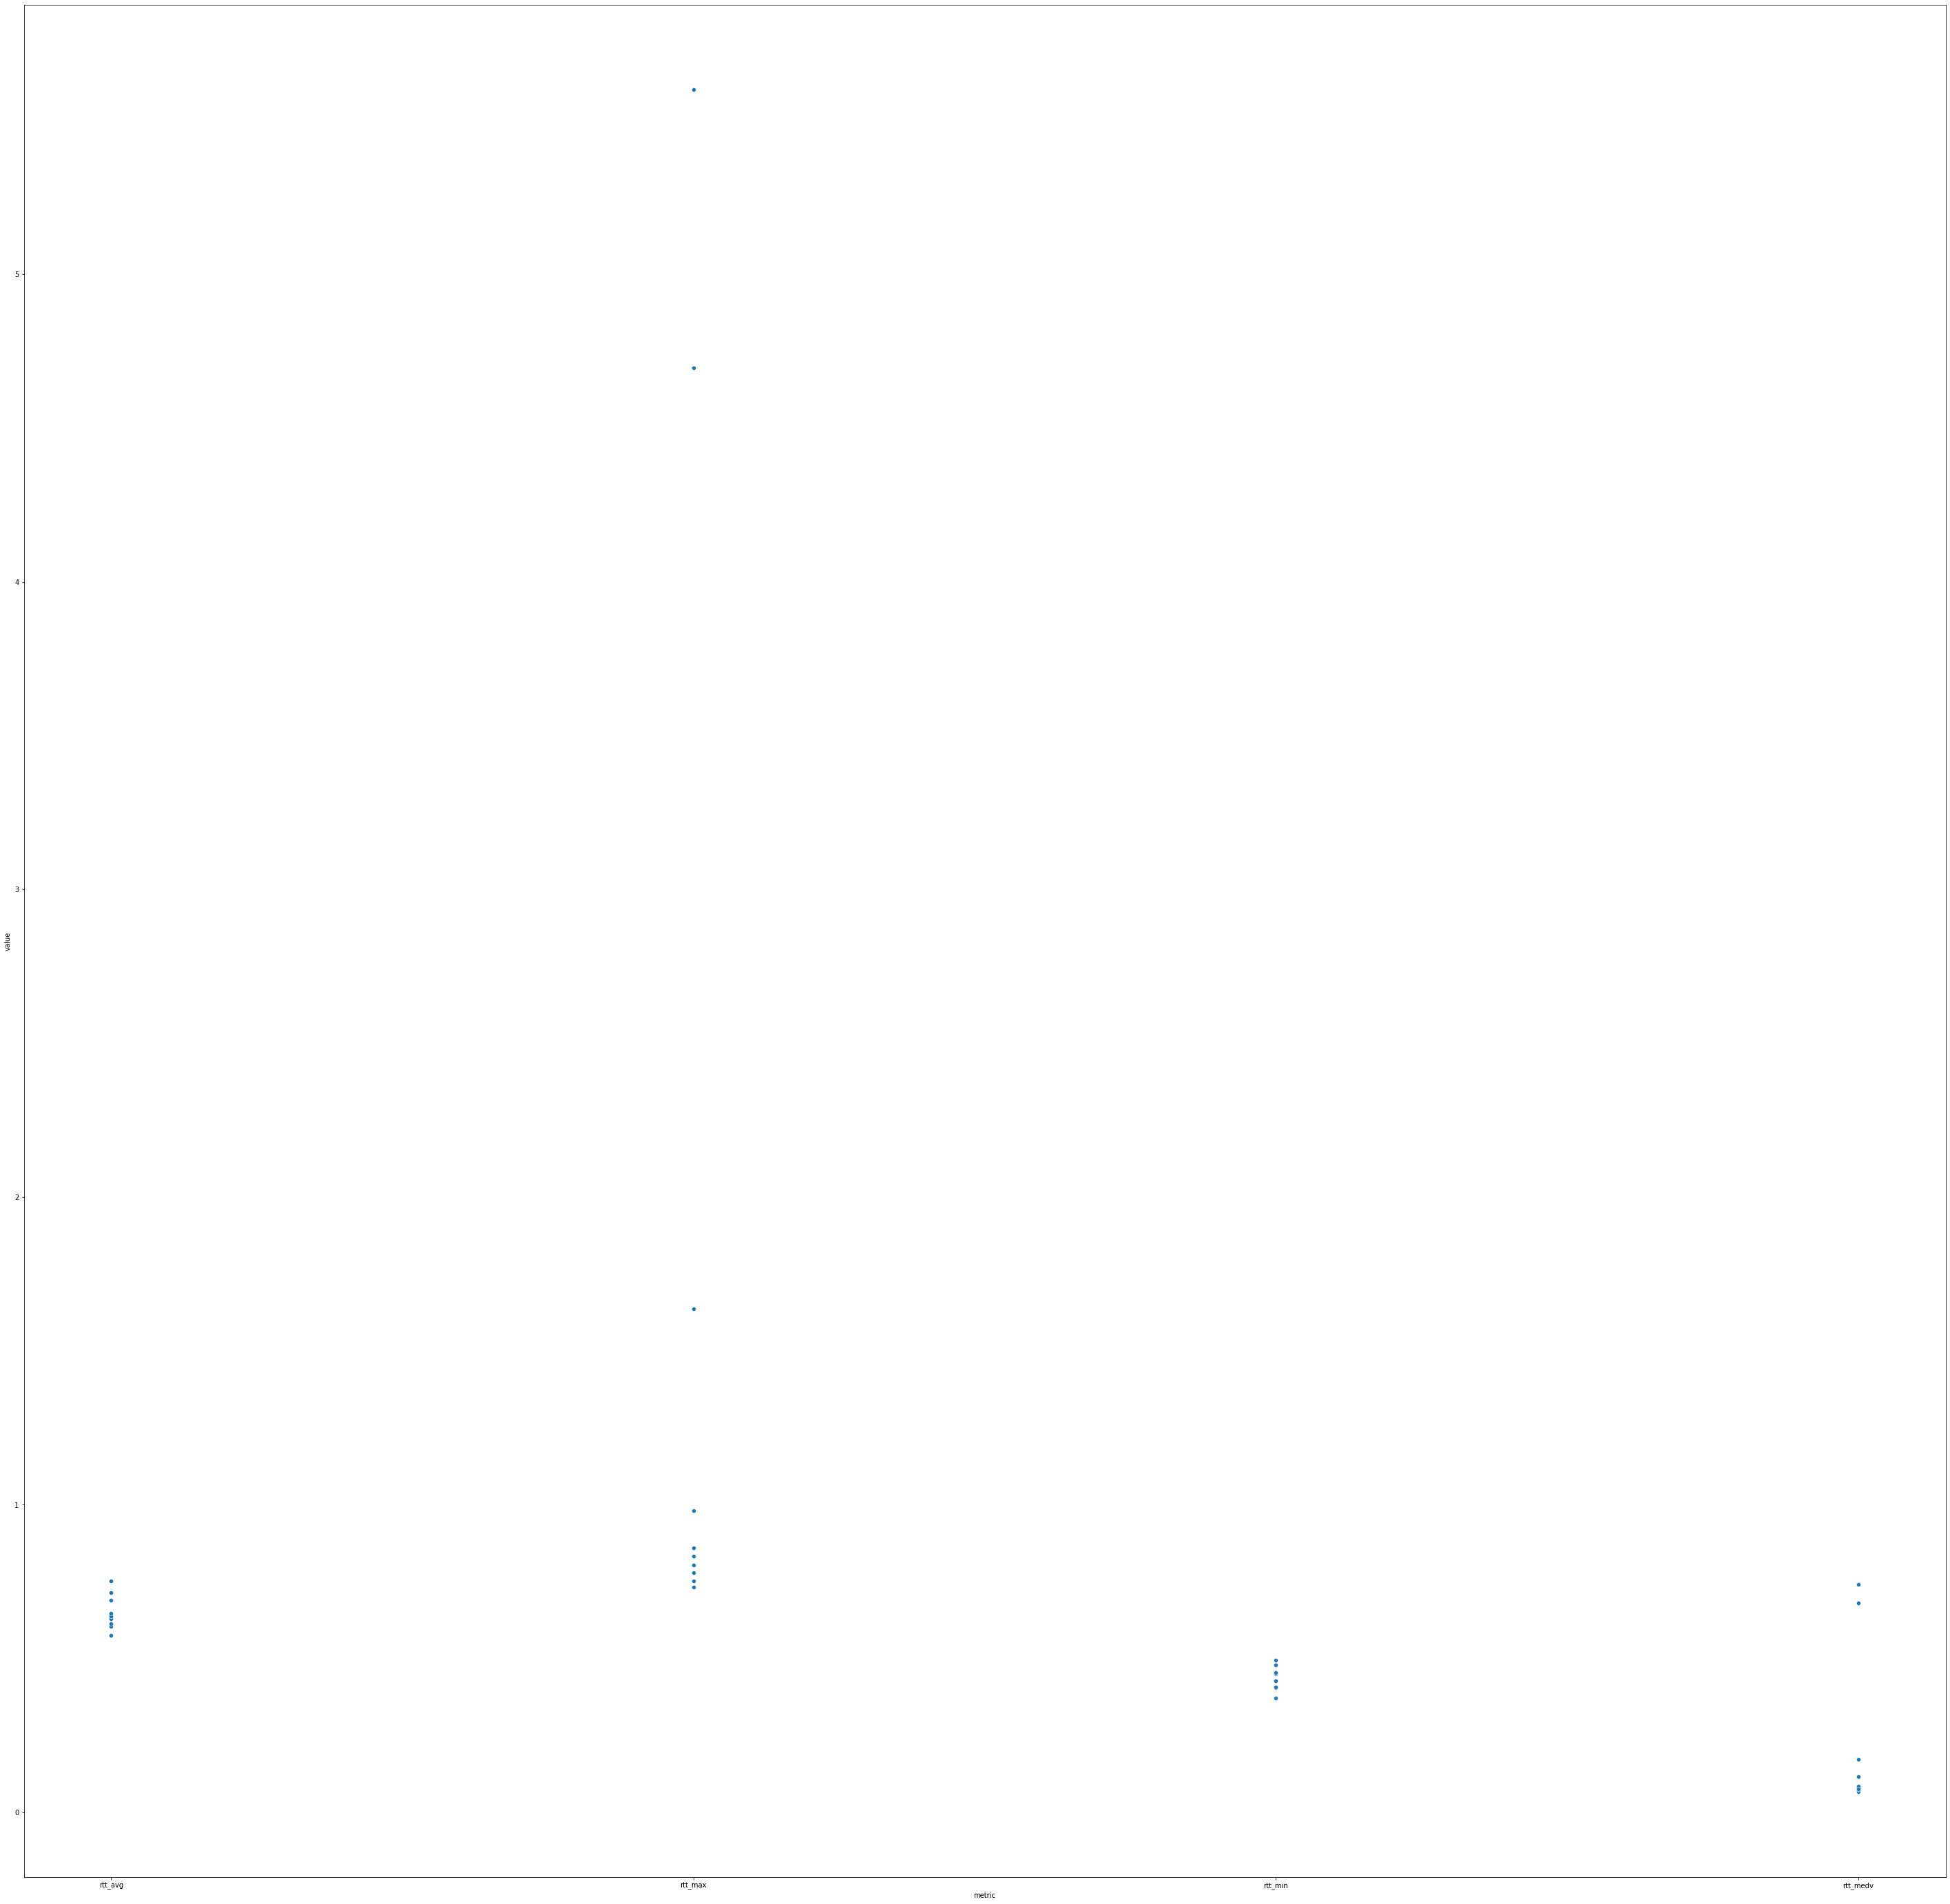

In [5]:
sns.scatterplot(data=df_ping, x="metric", y="value")